In [1]:
import sqlite3
from sqlalchemy import create_engine
import json
import pandas as pd
import unidecode
import numpy as np
import time
import pickle

In [31]:
with open('tags.json') as tags:
    tags_file = tags.readlines()
tags_array = []
for track_tags in tags_file:
    track_tags = json.loads(track_tags)
    artist = track_tags['_id']['artist']
    track = track_tags['_id']['track']
    i = track_tags['i']
    for tag, weight in track_tags['tags'].items():
        tags_array.append({'artist': artist, 'track': track, 'i': i, 'tag': tag, 'weight': weight}) 

In [33]:
tags_df = pd.DataFrame(tags_array)
tags_df

,artist,track,i,tag,weight
0,Gotye,Somebody That I Used to Know,36346257,indie,100
1,Gotye,Somebody That I Used to Know,36346257,alternative,79
2,Gotye,Somebody That I Used to Know,36346257,electronic,40
3,Gotye,Somebody That I Used to Know,36346257,australian,37
4,Gotye,Somebody That I Used to Know,36346257,love at first listen,37
...,...,...,...,...,...
25374606,Alan Parsons Project,Eye In The Sky,14456757,1980's,2
25374607,Alan Parsons Project,Eye In The Sky,14456757,Eric Woolfson,2
25374608,Alan Parsons Project,Eye In The Sky,14456757,jtm 70s,2
25374609,Johnny Tillotson,I'm so Lonesome I Could Cry,19888307,60s,100


In [52]:
tags_df.to_pickle('data/tags.pkl')

In [55]:
with open('tags-micro-genres.json') as micro_genres:
    micro_genre_file = micro_genres.readlines()
micro_genre_array = []
for track_genre in micro_genre_file:
    track_genre = json.loads(track_genre)
    artist = track_genre['_id']['artist']
    track = track_genre['_id']['track']
    i = track_genre['i']
    for micro_genre, weight in track_genre['tags'].items():
        micro_genre_array.append({'artist': artist, 'track': track, 'i': i,
                                  'micro_genre': micro_genre, 'weight': weight}) 

In [56]:
micro_genre_df = pd.DataFrame(micro_genre_array)
micro_genre_df

,artist,track,i,micro_genre,weight
0,Gotye,Somebody That I Used to Know,36346257,pop,19
1,Gotye,Somebody That I Used to Know,36346257,indie pop,10
2,Gotye,Somebody That I Used to Know,36346257,rock,5
3,Gotye,Somebody That I Used to Know,36346257,singer-songwriter,4
4,Gotye,Somebody That I Used to Know,36346257,indie rock,4
...,...,...,...,...,...
4983352,Alan Parsons Project,Eye In The Sky,14456757,easy listening,4
4983353,Alan Parsons Project,Eye In The Sky,14456757,pop rock,2
4983354,Alan Parsons Project,Eye In The Sky,14456757,album rock,2
4983355,Alan Parsons Project,Eye In The Sky,14456757,yacht rock,2


In [57]:
micro_genre_df.to_pickle('data/micro_genre.pkl')

In [66]:
with open('lyrics-features.json') as features:
    features_file = features.readlines()
features_array = []
for track_features in features_file:
    track_features = json.loads(track_features)
    features_array.append({'artist': track_features['_id']['artist'],
                           'track': track_features['_id']['track'],
                           'i': track_features['i'],
                           'token_count': track_features['features']['lexical']['token_count'],
                           'line_count': track_features['features']['lexical']['line_count'],
                           'character_count': track_features['features']['lexical']['character_count'],
                           'stop_word_count': track_features['features']['lexical']['stop_word_count'],
                           'hyphen_count': track_features['features']['lexical']['hyphen_count'],
                           'compression_ratio': track_features['features']['compression_ratio'],
                           'entropy': track_features['features']['entropy']}) 

In [68]:
features_df = pd.DataFrame(features_array)
features_df

,artist,track,i,token_count,line_count,character_count,stop_word_count,hyphen_count,compression_ratio,entropy
0,Sweatshop Union,The Way,40817731,630,65,2757,248,2,2.099323,5.017779
1,Fischerspooner,Tone Poem,41750244,73,17,378,26,2,1.462633,4.003091
2,Bedouin Soundclash,Eloween Deowen,13614982,296,76,1350,131,16,3.026258,4.183733
3,Luca Turilli,Demonheart (Vocals By André Matos),11518096,198,44,1060,85,0,1.678955,4.737812
4,Ruff Endz,Bigger,6841716,272,39,1258,137,2,1.959029,4.754554
...,...,...,...,...,...,...,...,...,...,...
1266549,Quiet Hollers,Flood Song,15333577,275,36,1358,115,2,2.124451,4.852222
1266550,Jon DeRosa,The Sun Is Crying,40668405,228,17,943,104,0,2.350467,4.100900
1266551,Esben and the Witch,Hexagons II (The Flight),18296918,148,21,650,63,0,2.292453,3.417732
1266552,Jay-Z,New Day,28168833,383,72,1707,160,0,2.153846,4.824087


In [69]:
features_df.to_pickle('data/features.pkl')

In [35]:
with open('tracks.tsv', 'r', encoding='utf8') as f:
    header = f.readline().replace('\n', '')
    columns = header.split('\t')
    n = len(columns)
    data = []
    line = f.readline()
    while line:
        values = line.split('\t')
        if len(values) != n:
            line = f.readline()
            continue
        data.append({columns[i]: values[i].strip('!').replace('\n', '') for i in range(n)})
        line = f.readline()
data

[{'track_id': '0', 'artist_name': 'Mika Miko', 'track_name': ''},
 {'track_id': '1', 'artist_name': 'Comm', 'track_name': '\x01'},
 {'track_id': '2', 'artist_name': 'deadmau5', 'track_name': '\x01'},
 {'track_id': '3', 'artist_name': 'Rasheed Chappell', 'track_name': '\x03'},
 {'track_id': '4', 'artist_name': 'rck', 'track_name': '\x03'},
 {'track_id': '5',
  'artist_name': 'Неизвест. исполнитель',
  'track_name': '\x04\x04\x04\x04\x04\x04\x04'},
 {'track_id': '6',
  'artist_name': '[AMATORY]',
  'track_name': '\x04\x04\x04\x04\x04\x04\x04\x04\x04\x04'},
 {'track_id': '7', 'artist_name': 'X Japan', 'track_name': '\x05'},
 {'track_id': '8', 'artist_name': 'Oliver', 'track_name': '\x06蘆葦枯乾'},
 {'track_id': '9',
  'artist_name': "'Q@=K9 \x1a>D5",
  'track_name': '\x10 \x1d0H-">, \x1d0H'},
 {'track_id': '10',
  'artist_name': '\x110=40 G5BK@QE',
  'track_name': '\x10=0@E8O =5 :0B8B'},
 {'track_id': '11', 'artist_name': 'Drudkh', 'track_name': '\x1157G5ABO I'},
 {'track_id': '12', 'artist_n

In [36]:
tracks_df = pd.DataFrame(data)
tracks_df

,track_id,artist_name,track_name
0,0,Mika Miko,
1,1,Comm,
2,2,deadmau5,
3,3,Rasheed Chappell,
4,4,rck,
...,...,...,...
50813368,50813368,ЗупиниЛося,"🦌 ЗупиниЛося №60. Бійки, стрілянина і табуни д..."
50813369,50813369,ЗупиниЛося,🦌 ЗупиниЛося №69. Повний паркувальний бардак н...
50813370,50813370,Lost Cascades,🧝‍♀️ 𝒜 𝒮𝓉𝓇𝒶𝓃𝑔𝑒𝓇 𝒜𝓅𝓅𝓇𝑜𝒶𝒸𝒽𝑒𝓈: '𝒟𝓇𝒶𝓊⻕
50813371,50813371,Lost Cascades,🧝♀️ 𝒜 𝒮𝓉𝓇𝒶𝓃𝑔𝑒𝓇 𝒜𝓅𝓅𝓇𝑜𝒶𝒸𝒽𝑒𝓈: '𝒟𝓇𝒶𝓊𝑔𝒽𝓉 𝑜𝒻 𝐵𝓁𝑒𝓈𝓈𝑒𝒹...


In [37]:
tracks_df.to_pickle('data/tracks.pkl')

In [57]:
users = pd.read_csv('users.tsv', sep='\t')
users.dropna(inplace=True)

<AxesSubplot:>

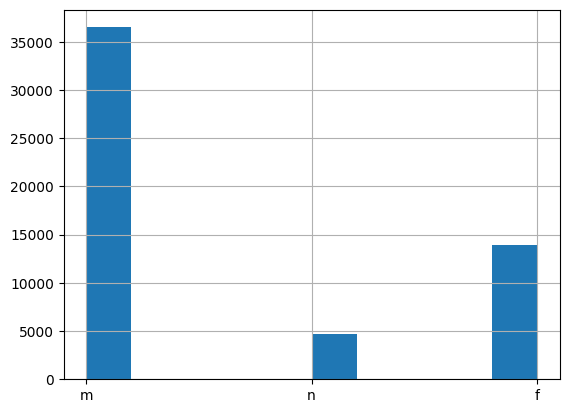

In [58]:
users.gender.hist()

<AxesSubplot:>

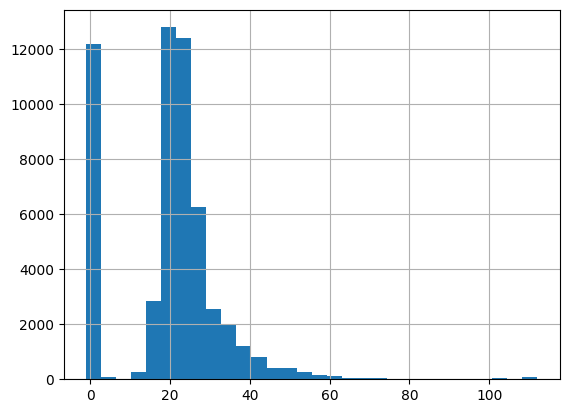

In [59]:
users.age.hist(bins=30)

In [11]:
users = pd.read_csv('users.tsv', sep='\t')
users.dropna(inplace=True)
users = users[(users['age']>10)&(users['gender']!='n')]
users = users.sample(n=1000, random_state = 13243)

In [3]:
users.country.unique()

array(['US', 'DE', 'CO', 'RU', 'VE', 'BR', 'PL', 'TH', 'UK', 'AT', 'IT',
       'ES', 'NL', 'MX', 'JP', 'RO', 'AU', 'IL', 'SE', 'SK', 'FR', 'NO',
       'BG', 'CL', 'TN', 'LT', 'CA', 'FI', 'GR', 'LV', 'CZ', 'UA', 'BE',
       'AR', 'MG', 'DK', 'ID', 'PY', 'NZ', 'BY', 'HU', 'PT', 'IE', 'KZ',
       'KR', 'ZA', 'CX', 'MN', 'RS', 'CH', 'CN', 'HK', 'MK', 'HR', 'TR',
       'BD', 'PE', 'AD', 'VN', 'SG', 'AQ', 'SI', 'JM', 'BN', 'CR', 'IS',
       'SA', 'PH', 'VA', 'MD', 'CY', 'EE', 'IR', 'LU', 'MW', 'TW', 'IN'],
      dtype=object)

<AxesSubplot:>

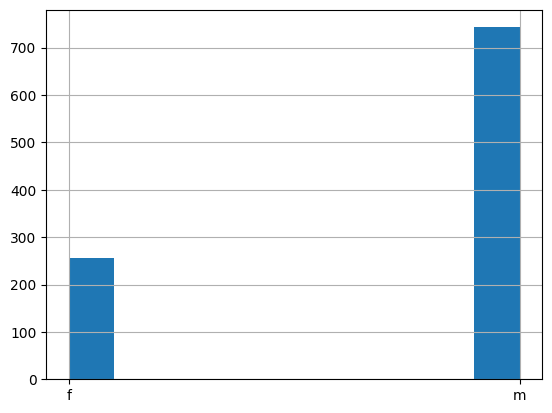

In [4]:
users.gender.hist()

<AxesSubplot:>

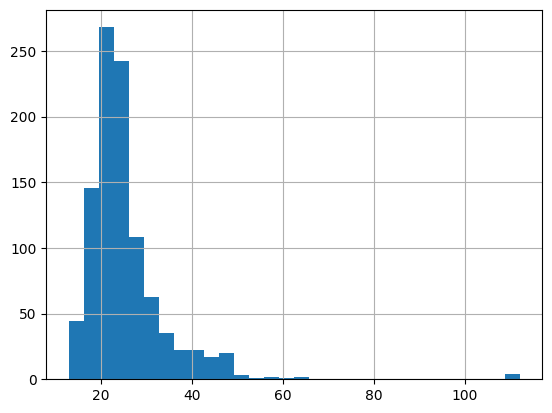

In [5]:
users.age.hist(bins=30)

In [65]:
filtered_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7140834 entries, 472626 to 518531461
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   track_id  int64
 2   count     int64
dtypes: int64(3)
memory usage: 217.9 MB


In [6]:
columns = pd.read_csv('listening-events.tsv', sep='\t', nrows=1)
columns = columns.columns

In [8]:
ids = users.user_id.values

In [ ]:

n = 5000000
i = 830
while n == 5000000:
    events = pd.read_csv('listening-events.tsv', sep='\t', 
                         skiprows=i * 1000000, nrows= 5000000, names=columns)
    n = events.shape[0]
    events = events[events.user_id.isin(ids)]
    events.to_pickle(f'pickles/{i}.pkl')
    i += 5
    if i % 10 == 0:
        print(i)

In [3]:
df_array_1 = []
for i in np.arange(185):
    df = pd.read_pickle(f'pickles/{i}.pkl')
    df_array_1.append(df)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184


In [5]:
df_array_2 = []
for i in np.arange(185, 826, 5):
    df = pd.read_pickle(f'pickles/{i}.pkl')
    df_array_2.append(df)
    print(i)


185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825


In [6]:
df_1 = pd.concat(df_array_1)

In [7]:
df_2 = pd.concat(df_array_2)

In [8]:
df = pd.concat([df_1, df_2])

In [10]:
len(df.user_id.unique())

710

In [13]:
events_users = users[users.user_id.isin(df.user_id.unique())]

<AxesSubplot:>

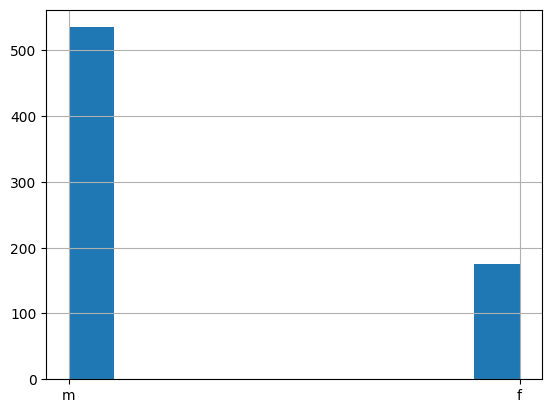

In [14]:
events_users.gender.hist()

<AxesSubplot:>

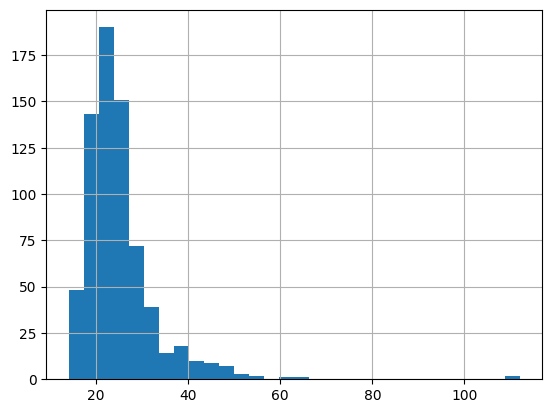

In [16]:
events_users.age.hist(bins=30)

In [22]:
events_users.to_pickle('users_filtered.pkl')

In [18]:
df.to_pickle('listening_events_filtered.pkl')

In [38]:
df.head()

,user_id,track_id,album_id,timestamp
434246,5090,12533056,8128141,2014-02-08 23:12:09
434247,5090,36383760,8009856,2014-02-08 22:54:39
434248,5090,34502741,1677788,2014-02-08 22:20:23
434249,5090,33547637,5574231,2014-02-08 22:01:57
434250,5090,44775825,13335902,2014-02-08 21:47:09


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12059488 entries, 434246 to 3461011
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    object
 1   track_id   object
 2   album_id   object
 3   timestamp  object
dtypes: object(4)
memory usage: 460.0+ MB


In [21]:
df.groupby('user_id').count()

,track_id,album_id,timestamp
user_id,,,
54,19958,19958,19958
83,19514,19514,19514
153,99521,99521,99521
208,19999,19999,19999
252,18197,18197,18197
...,...,...,...
110831,19615,19615,19615
110880,18980,18980,18980
112065,5237,5237,5237


In [40]:
with open('albums.tsv', 'r', encoding='utf8') as f:
    header = f.readline().replace('\n', '')
    columns = header.split('\t')
    n = len(columns)
    data = []
    line = f.readline()
    while line:
        values = line.split('\t')
        if len(values) != n:
            line = f.readline()
            continue
        data.append({columns[i]: values[i].replace('\n', '') for i in range(n)})
        line = f.readline()
data

[{'album_id': '0', 'album_name': '', 'artist_name': ''},
 {'album_id': '1', 'album_name': '', 'artist_name': '\x01##Horror Inc'},
 {'album_id': '2', 'album_name': '', 'artist_name': '\x10840 \x1d8:>;09GC:'},
 {'album_id': '3', 'album_name': '', 'artist_name': '\x1d DEÿD VIRGIN \x1d'},
 {'album_id': '4', 'album_name': '', 'artist_name': '!'},
 {'album_id': '5',
  'album_name': '',
  'artist_name': "!\x01ÿ þM a s t e r ' s   H a m m e r"},
 {'album_id': '6',
  'album_name': '',
  'artist_name': '!\x01ÿ þR i n g s   o f   S a t u r n'},
 {'album_id': '7',
  'album_name': '',
  'artist_name': '!\x10\x1c\x11\x1b, % \x18!"\x10 !\x1f\x10!\x18"\x15\x1b/'},
 {'album_id': '8', 'album_name': '', 'artist_name': '!\x14 aka !0\x148AB'},
 {'album_id': '9',
  'album_name': '',
  'artist_name': '!       ^  Scotty Pres. Yamboo Ft. Dr. Alban'},
 {'album_id': '10', 'album_name': '', 'artist_name': '!      ^  The KLF'},
 {'album_id': '11', 'album_name': '', 'artist_name': '!     ^  Cicada'},
 {'album_id': 

In [41]:
albums_df = pd.DataFrame(data)
albums_df

,album_id,album_name,artist_name
0,0,,
1,1,,##Horror Inc
2,2,,840 8:>;09GC:
3,3,,DEÿD VIRGIN
4,4,,!
...,...,...,...
24237343,24237343,🟠Tvelve Hours of Sunset 🟡2012 🔴1976 1984 1994 ...,David Bedford
24237344,24237344,"🟣Carte Blanche 🔴1808,1838,1816,1910,1824,1921,...","Mildred J. Hill, Patty Hill"
24237345,24237345,"🟣Carte Blanche 🔴1808,1838,1816,1910,1824,1921,...",Witold Lutosławski
24237346,24237346,🟧Fear of Music 🟩🟦2006,Talking Heads


In [47]:
albums_df.to_pickle('data/albums.pkl')

In [50]:
artists_df = pd.read_csv('artists.tsv', sep='\t')

In [51]:
artists_df.to_pickle('data/artists.pkl')

In [2]:
events_filtered = pd.read_pickle('data/listening_events_filtered.pkl')

In [3]:
events_filtered

,user_id,track_id,album_id,timestamp
434246,5090,12533056,8128141,2014-02-08 23:12:09
434247,5090,36383760,8009856,2014-02-08 22:54:39
434248,5090,34502741,1677788,2014-02-08 22:20:23
434249,5090,33547637,5574231,2014-02-08 22:01:57
434250,5090,44775825,13335902,2014-02-08 21:47:09
...,...,...,...,...
3461007,29622,40146671,20059465,2009-01-26 12:47:56
3461008,29622,6245708,6383777,2009-01-26 12:32:39
3461009,29622,41352353,11002160,2009-01-26 12:21:00
3461010,29622,36747225,13229312,2009-01-26 12:07:47


In [4]:
tracks = pd.read_pickle('data/tracks.pkl')

In [9]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50813373 entries, 0 to 50813372
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   track_id     object
 1   artist_name  object
 2   track_name   object
dtypes: object(3)
memory usage: 1.1+ GB


In [20]:
events_filtered.track_id = events_filtered.track_id.astype(int)

In [22]:
tracks.track_id = tracks.track_id.astype(int)

In [10]:
events_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12059488 entries, 434246 to 3461011
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    object
 1   track_id   object
 2   album_id   object
 3   timestamp  object
dtypes: object(4)
memory usage: 460.0+ MB


In [25]:
tracks_filtered = tracks[tracks['track_id'].isin(events_filtered.track_id)].reset_index(drop=True)
tracks_filtered

,track_id,artist_name,track_name
0,154,Ghostface Killah,
1,172,Kina Grannis,
2,174,Kylie Minoise,
3,179,Mari! Mari,
4,212,Revlovers,
...,...,...,...
1541797,50812130,RIP SLYME,ﾗｳﾞぃ(ﾘｯﾌﾟｽﾗｲﾑとくるり)
1541798,50812435,Parken,�t Helvete Med Himlen
1541799,50812460,Tenkorr,��� ��� ���������� (�.�.�.)
1541800,50812501,Дельфин,�������


In [26]:
events_filtered = events_filtered.reset_index(drop=True)
events_filtered

,user_id,track_id,album_id,timestamp
0,5090,12533056,8128141,2014-02-08 23:12:09
1,5090,36383760,8009856,2014-02-08 22:54:39
2,5090,34502741,1677788,2014-02-08 22:20:23
3,5090,33547637,5574231,2014-02-08 22:01:57
4,5090,44775825,13335902,2014-02-08 21:47:09
...,...,...,...,...
12059483,29622,40146671,20059465,2009-01-26 12:47:56
12059484,29622,6245708,6383777,2009-01-26 12:32:39
12059485,29622,41352353,11002160,2009-01-26 12:21:00
12059486,29622,36747225,13229312,2009-01-26 12:07:47


In [27]:
tags = pd.read_pickle('data/tags.pkl')

In [29]:
tags.i = tags.i.astype(int)

In [30]:
tags_filtered = tags[tags['i'].isin(events_filtered.track_id)].reset_index(drop=True)
tags_filtered

,artist,track,i,tag,weight
0,Gotye,Somebody That I Used to Know,36346257,indie,100
1,Gotye,Somebody That I Used to Know,36346257,alternative,79
2,Gotye,Somebody That I Used to Know,36346257,electronic,40
3,Gotye,Somebody That I Used to Know,36346257,australian,37
4,Gotye,Somebody That I Used to Know,36346257,love at first listen,37
...,...,...,...,...,...
14390107,Alan Parsons Project,Eye In The Sky,14456757,1980s,2
14390108,Alan Parsons Project,Eye In The Sky,14456757,rock ballads,2
14390109,Alan Parsons Project,Eye In The Sky,14456757,1980's,2
14390110,Alan Parsons Project,Eye In The Sky,14456757,Eric Woolfson,2


In [31]:
micro_genre = pd.read_pickle('data/micro_genre.pkl')

In [33]:
micro_genre.i = micro_genre.i.astype(int)

In [34]:
micro_genre_filtered = micro_genre[micro_genre['i'].isin(events_filtered.track_id)].reset_index(drop=True)
micro_genre_filtered

,artist,track,i,micro_genre,weight
0,Gotye,Somebody That I Used to Know,36346257,pop,19
1,Gotye,Somebody That I Used to Know,36346257,indie pop,10
2,Gotye,Somebody That I Used to Know,36346257,rock,5
3,Gotye,Somebody That I Used to Know,36346257,singer-songwriter,4
4,Gotye,Somebody That I Used to Know,36346257,indie rock,4
...,...,...,...,...,...
2593456,Alan Parsons Project,Eye In The Sky,14456757,easy listening,4
2593457,Alan Parsons Project,Eye In The Sky,14456757,pop rock,2
2593458,Alan Parsons Project,Eye In The Sky,14456757,album rock,2
2593459,Alan Parsons Project,Eye In The Sky,14456757,yacht rock,2


In [35]:
albums = pd.read_pickle('data/albums.pkl')

In [37]:
albums.album_id = albums.album_id.astype(int)

In [38]:
albums_filtered = albums[albums['album_id'].isin(events_filtered.album_id)].reset_index(drop=True)
albums_filtered

,album_id,album_name,artist_name
0,27,,! Beautiful Mystic Mantra-Narayan-Durga
1,84,,! WWW.POLSKIE-MP3.TK ! soundtrack ogniem i mie...
2,163,,!! Reamonn (Rea Garvey)
3,167,,!!!
4,188,,!!! [chk chk chk]
...,...,...,...
563610,24236947,ﾍﾒﾋﾃﾑ隗,ﾍﾒﾋﾃﾑ隗
563611,24236965,ﾎﾑﾁ,Hum
563612,24237066,ﾓﾎ沢ﾍ・･ﾇ･螂ｨ･・筵ｹ･ｿｩ`･ｺwww.db23.com [Yu-Gi-Oh!],[Kimeru] ﾇ睛ﾉﾒｻｿﾌ[ﾒﾖﾍ
563613,24237158,� �͟ P�,Doctor


In [39]:
artists = pd.read_pickle('data/artists.pkl')

In [42]:
artists_filtered = artists[artists['artist_name'].isin(tracks_filtered.artist_name)].reset_index(drop=True)
artists_filtered

,artist_id,artist_name
0,1252,Pogo
1,1255,The Prodigy
2,1289,13
3,1290,14
4,1295,19
...,...,...
171903,5158476,ﾍﾕﾊｫﾖ雹
171904,5158570,ﾒｻ･ﾎ栫･ﾈ･ｭ･・CV:稽ﾒｰﾕ賁ﾘ)
171905,5158575,ﾓﾃｳﾉ携
171906,5158617,ﾖﾜﾓ蠹・ﾐ・ﾂ


In [43]:
features = pd.read_pickle('data/features.pkl')

In [45]:
features.i = features.i.astype(int)

In [46]:
features_filtered = features[features['i'].isin(events_filtered.track_id)].reset_index(drop=True)
features_filtered

,artist,track,i,token_count,line_count,character_count,stop_word_count,hyphen_count,compression_ratio,entropy
0,Fischerspooner,Tone Poem,41750244,73,17,378,26,2,1.462633,4.003091
1,Bedouin Soundclash,Eloween Deowen,13614982,296,76,1350,131,16,3.026258,4.183733
2,The So So Glos,Blowout,7221218,28,7,113,4,1,1.057971,2.849235
3,Atmos,Twin Reaction,42476965,1106,14,5870,468,11,2.136853,5.398453
4,Charli XCX,!Franchesckaar!,1968,535,122,2443,180,1,3.936407,3.691611
...,...,...,...,...,...,...,...,...,...,...
278040,Jay Park,Touch The Sky (Feat. The Quiett),41887755,448,99,1838,102,0,2.160240,4.694272
278041,4minute,Dream Racer,12773940,460,77,1565,124,0,3.292398,4.074424
278042,Rain,Love Song (English Version),24908365,638,103,2937,211,0,2.846512,5.027780
278043,Esben and the Witch,Hexagons II (The Flight),18296918,148,21,650,63,0,2.292453,3.417732


In [47]:
events_filtered.to_pickle('data_filtered/events.pkl')

In [48]:
albums_filtered.to_pickle('data_filtered/albums.pkl')

In [49]:
artists_filtered.to_pickle('data_filtered/artists.pkl')

In [50]:
features_filtered.to_pickle('data_filtered/features.pkl')

In [51]:
micro_genre_filtered.to_pickle('data_filtered/micro_genre.pkl')

In [52]:
tags_filtered.to_pickle('data_filtered/tags.pkl')

In [53]:
tracks_filtered.to_pickle('data_filtered/tracks.pkl')

In [54]:
users_filtered = pd.read_pickle('data/users_filtered.pkl')

In [56]:
users_filtered = users_filtered.reset_index(drop=True)
users_filtered

,user_id,country,age,gender,creation_time
0,11301,CO,23,m,2007-04-06 17:59:49
1,4635,DE,22,m,2006-04-02 19:39:19
2,27788,CO,22,m,2008-12-09 22:28:13
3,24716,RU,23,m,2008-09-13 19:19:49
4,74099,VE,30,m,2011-10-19 17:24:24
...,...,...,...,...,...
705,11383,US,22,f,2007-04-10 00:38:34
706,2083,ZA,25,m,2005-08-11 17:14:10
707,52476,US,24,m,2010-08-13 13:10:44
708,21861,ES,22,m,2008-06-09 20:42:30


In [57]:
users_filtered.to_pickle('data_filtered/users.pkl')